In [1]:
# 导入相关的包

# 随机模块
import random

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# numpy
import numpy as np

# pytorch
import torch
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import Dataset,TensorDataset,DataLoader
from torch.utils.tensorboard import SummaryWriter

# 导入自定义模块
from torchLearning import *

# 导入以下包从而使得可以在 jupyter 中的 cell 输出多个结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

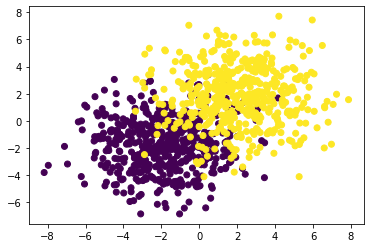

In [2]:
# 生成数据集

# 设置随机数种子
torch.manual_seed(420)

features,labels = tensorGenCla(bias=True,num_class=2)
plt.scatter(features[:,0],features[:,1],c=labels)

In [3]:
features

tensor([[-2.0141, -0.9911,  1.0000],
        [-0.6593, -2.7657,  1.0000],
        [-1.9395, -1.2347,  1.0000],
        ...,
        [ 2.9623,  2.0861,  1.0000],
        [ 0.4535, -0.2140,  1.0000],
        [-2.6681,  3.3935,  1.0000]])

In [4]:
# 建模过程

In [5]:
# 模型选择

# 对于二分类问题可以不输出两个结果 [0.1,0.6],
# 而是简单的输出一个结果 [data1_p] data1_p > 0.5 ? 1 : 0

In [6]:
# 激活函数

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

In [7]:
#  逻辑回归模型 向前传播过程

def logistic(X,w):
    return sigmoid(torch.mm(X,w))

In [8]:
# 辅助函数

# 分类函数
def cal(sigma,p = 0.5):
    return ((sigma >= p).float())

In [9]:
# 准确率函数

def accuracy(sigma,y):
    acc_bool = cal(sigma).flatten() == y.flatten()
    acc = torch.mean(acc_bool.float())
    
    return (acc)

In [10]:
# 定义损失函数

def cross_entropy(sigma,y):
    
    return (-(1/y.numel()) * torch.sum((1-y)*torch.log(1-sigma) + y*torch.log(sigma)))

In [11]:
# 定义优化方法

def sgd(params,lr):
    params.data -= lr * params.grad
    params.grad.zero_()

In [12]:
# 训练模型

In [13]:
features

tensor([[-2.0141, -0.9911,  1.0000],
        [-0.6593, -2.7657,  1.0000],
        [-1.9395, -1.2347,  1.0000],
        ...,
        [ 2.9623,  2.0861,  1.0000],
        [ 0.4535, -0.2140,  1.0000],
        [-2.6681,  3.3935,  1.0000]])

In [14]:
torch.manual_seed(420)

# 初始化核心参数
batch_size = 10
lr = 0.03
num_epochs = 3
w = torch.ones(3,1,requires_grad=True) # w初始尽量不要全0，可能会造成摊平

# 参与训练的模型方程
net = logistic
loss = cross_entropy

# 训练过程
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w),y)
        l.backward()
        sgd(w,lr)
    train_acc = accuracy( net(features,w), labels)
    print('epoch %d, accuracy %f' % (epoch+1 , train_acc))

epoch 1, accuracy 0.904000
epoch 2, accuracy 0.908000
epoch 3, accuracy 0.914000


In [15]:
w

tensor([[1.0011],
        [0.9798],
        [0.5760]], requires_grad=True)

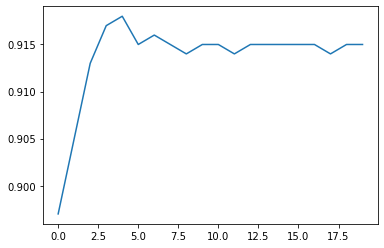

In [16]:
# 模型调试 增加迭代次数

torch.manual_seed(420)

num_epochs = 20

w = torch.ones(3,1,requires_grad = True)

# 设置列表容器
train_acc = []

# 执行迭代
for i in range(num_epochs):
    for epoch in range(i):
        for X,y in data_iter(batch_size,features,labels):
            l = loss(net(X,w),y)
            l.backward()
            sgd(w,lr)
            
    train_acc.append(accuracy(net(features,w), labels))
        
# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

In [17]:
train_acc

[tensor(0.8970),
 tensor(0.9050),
 tensor(0.9130),
 tensor(0.9170),
 tensor(0.9180),
 tensor(0.9150),
 tensor(0.9160),
 tensor(0.9150),
 tensor(0.9140),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9140),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9140),
 tensor(0.9150),
 tensor(0.9150)]

#### 尝试增加数据难度

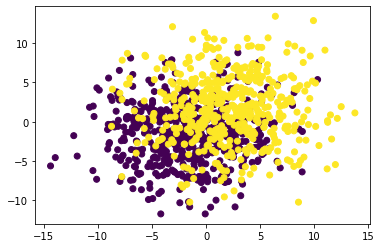

In [18]:
# 生成数据集

# 设置随机数种子
torch.manual_seed(420)

features,labels = tensorGenCla(bias=True,num_class=2,deg_dispersion=[4,4])
plt.scatter(features[:,0],features[:,1],c=labels)

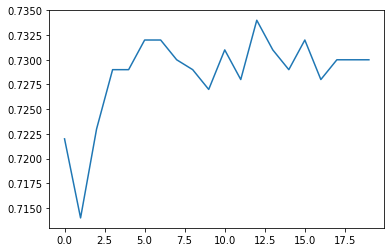

In [19]:
# 模型调试 增加迭代次数

torch.manual_seed(420)

num_epochs = 20

w = torch.ones(3,1,requires_grad = True)

# 设置列表容器
train_acc = []

# 执行迭代
for i in range(num_epochs):
    for epoch in range(i):
        for X,y in data_iter(batch_size,features,labels):
            l = loss(net(X,w),y)
            l.backward()
            sgd(w,lr)
            
    train_acc.append(accuracy(net(features,w), labels))
        
# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

In [20]:
train_acc

[tensor(0.7220),
 tensor(0.7140),
 tensor(0.7230),
 tensor(0.7290),
 tensor(0.7290),
 tensor(0.7320),
 tensor(0.7320),
 tensor(0.7300),
 tensor(0.7290),
 tensor(0.7270),
 tensor(0.7310),
 tensor(0.7280),
 tensor(0.7340),
 tensor(0.7310),
 tensor(0.7290),
 tensor(0.7320),
 tensor(0.7280),
 tensor(0.7300),
 tensor(0.7300),
 tensor(0.7300)]

## 逻辑回归的快速实现

In [21]:
# 定义核心参数

batch_size = 10
lr = 0.03
num_epochs = 3

In [22]:
# 数据准备
torch.manual_seed(420)

# 创建数据集
features,labels = tensorGenCla(num_class=2)
labels = labels.float() # 损失函数要求标签也必须是浮点型
data = TensorDataset(features,labels)
batchData = DataLoader(data,batch_size = batch_size,shuffle = True)

In [23]:
features

tensor([[-2.0141, -0.9911],
        [-0.6593, -2.7657],
        [-1.9395, -1.2347],
        ...,
        [ 2.9623,  2.0861],
        [ 0.4535, -0.2140],
        [-2.6681,  3.3935]])

In [24]:
# 定义模型

class logisticR(nn.Module):
    def __init__(self,in_features=2,out_features=1):
        super(logisticR,self).__init__()
        
        self.linear = nn.Linear(in_features,out_features,bias=True)
        
    def forward(self,X):
        out = self.linear(X)
        
        return out
    
# 实例化模型
logic_model = logisticR()

In [25]:
# 定义损失函数

criterion = nn.BCEWithLogitsLoss() # 该类会自动对输入对象进行sigmoid转化

In [26]:
# 定义优化方法
optimizer = optim.SGD(logic_model.parameters(),lr =lr)

In [27]:
# 模型训练

def fit(net,criterion,optimizer,batchData,epochs):
    for epoch in range(epochs):
        for X,y in batchData:
            loss = criterion(net.forward(X),y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [28]:
# 执行模型训练

torch.manual_seed(420)

fit(net = logic_model,
   criterion = criterion,
   optimizer = optimizer,
   batchData = batchData,
   epochs = num_epochs)

In [29]:
# 查看模型基本情况
logic_model

logisticR(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [30]:
# 查看模型参数
list(logic_model.parameters())

[Parameter containing:
 tensor([[0.8394, 0.8016]], requires_grad=True),
 Parameter containing:
 tensor([-0.2617], requires_grad=True)]

In [31]:
# 计算交叉熵损失
criterion(logic_model(features),labels)

tensor(0.2293, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [32]:
def acc_zhat(zhat,y):
    """输入为线性方程计算结果，输出为逻辑回归准确率的函数结果
    param zhat: 线性方程输出结果
    param y: 数据集标签张量
    return :准确率
    
    """
    sigma = sigmoid(zhat)
    
    return accuracy(sigma,y)

In [33]:
acc_zhat(logic_model(features),labels)

tensor(0.9130)

In [34]:
# 模型调试
# 创建数据
torch.manual_seed(420)

features,labels = tensorGenCla(num_class = 2)
labels = labels.float()
data = TensorDataset(features,labels)
batchData = DataLoader(data,batch_size = batch_size,shuffle = True)

In [35]:
torch.manual_seed(420)

# 初始化核心参数
num_epochs = 20
LR1 = logisticR()
cr1 = nn.BCEWithLogitsLoss()
op1 = optim.SGD(LR1.parameters(),lr=lr)

# 创建列表容器
train_acc = []

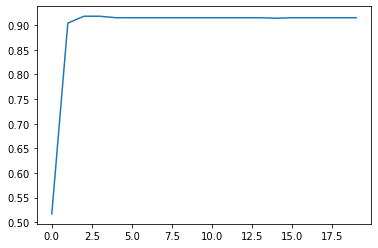

In [36]:
# 执行建模
for epochs in range(num_epochs):
    fit(net = LR1,
       criterion = cr1,
       optimizer = op1,
       batchData = batchData,
       epochs = epochs)
    epoch_acc = acc_zhat(LR1(features),labels)
    train_acc.append(epoch_acc)
    
# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

In [37]:
train_acc

[tensor(0.5170),
 tensor(0.9040),
 tensor(0.9180),
 tensor(0.9180),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9140),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150),
 tensor(0.9150)]

#### 尝试增加数据难度

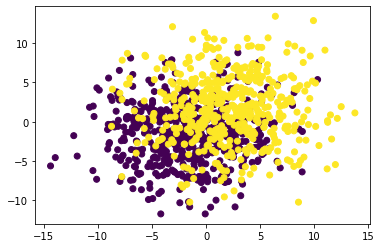

In [38]:
# 生成数据集

# 设置随机数种子
torch.manual_seed(420)

features,labels = tensorGenCla(num_class=2,deg_dispersion=[4,4])
labels = labels.float() # 损失函数要求标签也必须是浮点型
data = TensorDataset(features,labels)
batchData = DataLoader(data,batch_size = batch_size,shuffle = True)


plt.scatter(features[:,0],features[:,1],c=labels)

In [39]:
features.shape,labels.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

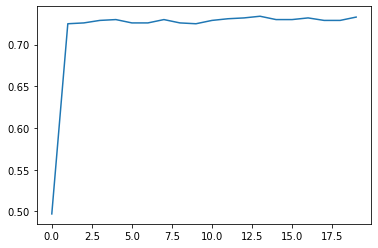

In [40]:
torch.manual_seed(420)

# 初始化核心参数
num_epochs = 20
LR1 = logisticR()
cr1 = nn.BCEWithLogitsLoss()
op1 = optim.SGD(LR1.parameters(),lr=lr)

# 创建列表容器
train_acc = []

# 执行建模
for epochs in range(num_epochs):
    fit(net = LR1,
       criterion = cr1,
       optimizer = op1,
       batchData = batchData,
       epochs = epochs)
    epoch_acc = acc_zhat(LR1(features),labels)
    train_acc.append(epoch_acc)
    
# 绘制图像查看准确率变化情况
plt.plot(list(range(num_epochs)), train_acc)

In [41]:
train_acc

[tensor(0.4970),
 tensor(0.7250),
 tensor(0.7260),
 tensor(0.7290),
 tensor(0.7300),
 tensor(0.7260),
 tensor(0.7260),
 tensor(0.7300),
 tensor(0.7260),
 tensor(0.7250),
 tensor(0.7290),
 tensor(0.7310),
 tensor(0.7320),
 tensor(0.7340),
 tensor(0.7300),
 tensor(0.7300),
 tensor(0.7320),
 tensor(0.7290),
 tensor(0.7290),
 tensor(0.7330)]

## 补充 实例化模型参数的随机取值

In [42]:
# 在手动创建模型类后，每次实例化都会随机生成一组参数值

# 定义模型

class logisticR(nn.Module):
    def __init__(self,in_features=2,out_features=1):
        super(logisticR,self).__init__()
        
        self.linear = nn.Linear(in_features,out_features,bias=True)
        
    def forward(self,X):
        out = self.linear(X)
        
        return out

In [43]:
list(logisticR().parameters())

[Parameter containing:
 tensor([[-0.2511, -0.1878]], requires_grad=True),
 Parameter containing:
 tensor([-0.6789], requires_grad=True)]

In [44]:
list(logisticR().parameters())

[Parameter containing:
 tensor([[0.0188, 0.0345]], requires_grad=True),
 Parameter containing:
 tensor([-0.1411], requires_grad=True)]

In [45]:
# 如果要完全浮现模型训练过程，则需要在实例化之前设置随机数种子，或者子啊上一个随机数种子之前规定有限次的随机次数
# 可以影响张量的随机过程，不能影响python原生的随机过程
torch.manual_seed(420)
list(logisticR().parameters())
list(logisticR().parameters())

[Parameter containing:
 tensor([[ 0.4318, -0.4256]], requires_grad=True),
 Parameter containing:
 tensor([0.6730], requires_grad=True)]

[Parameter containing:
 tensor([[-0.5617, -0.2157]], requires_grad=True),
 Parameter containing:
 tensor([-0.4873], requires_grad=True)]

In [46]:
torch.manual_seed(420)
list(logisticR().parameters())
list(logisticR().parameters())

[Parameter containing:
 tensor([[ 0.4318, -0.4256]], requires_grad=True),
 Parameter containing:
 tensor([0.6730], requires_grad=True)]

[Parameter containing:
 tensor([[-0.5617, -0.2157]], requires_grad=True),
 Parameter containing:
 tensor([-0.4873], requires_grad=True)]

In [47]:
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[4, 3, 1, 0, 2]

In [48]:
torch.manual_seed(420)
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[3, 0, 1, 4, 2]

In [49]:
torch.manual_seed(420)
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[1, 3, 4, 0, 2]

In [50]:
# random中可以通过设置random.seed来控制随机过程
random.seed(420)
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[4, 3, 1, 2, 0]

In [51]:
random.seed(420)
l = list(range(5))
l
random.shuffle(l)
l

[0, 1, 2, 3, 4]

[4, 3, 1, 2, 0]